<a href="https://colab.research.google.com/github/JishnaMR/Machine-_failure-_prediction/blob/main/Machine_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/major_project_teachnook/data (1).csv')

In [ ]:
# Display the first few rows
print(data.head())

   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
None


In [ ]:
# Normalizing/Standardizing features
import sklearn
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
numerical_cols = ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']
data[numerical_cols]=scalar.fit_transform(data[numerical_cols])


In [ ]:
#Split the Data
from sklearn.model_selection import train_test_split
# Define features and target variable
X = data.drop('fail', axis=1)
y = data['fail']
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Check for missing values
print(data.isnull().sum())

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


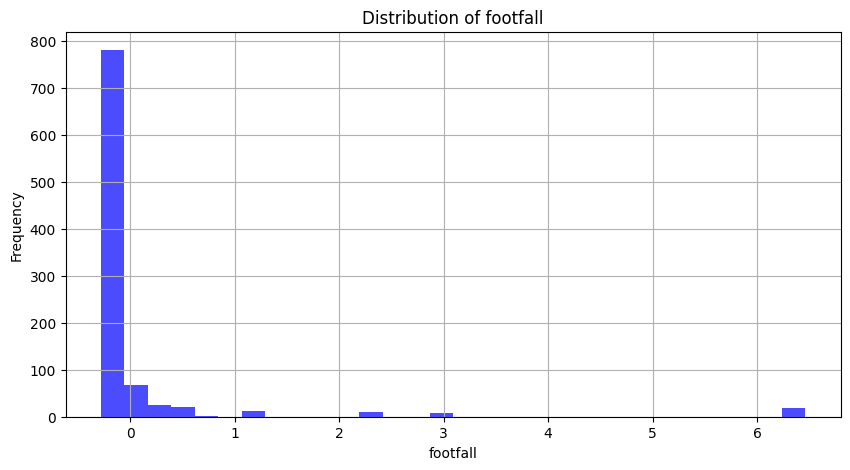

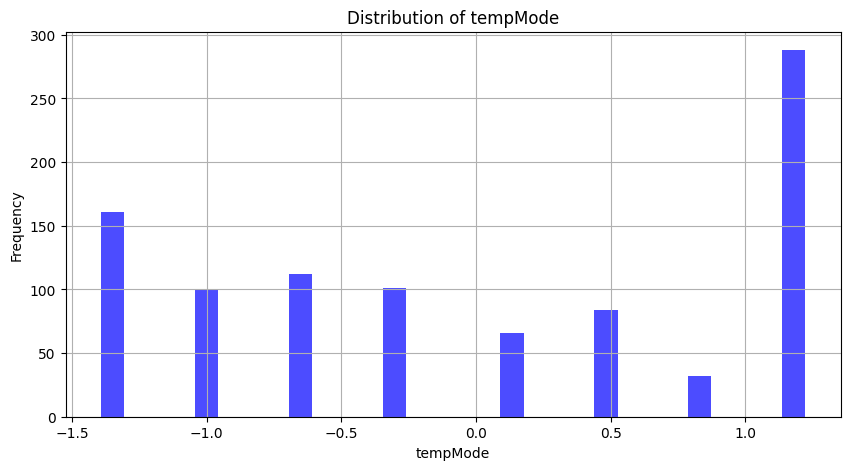

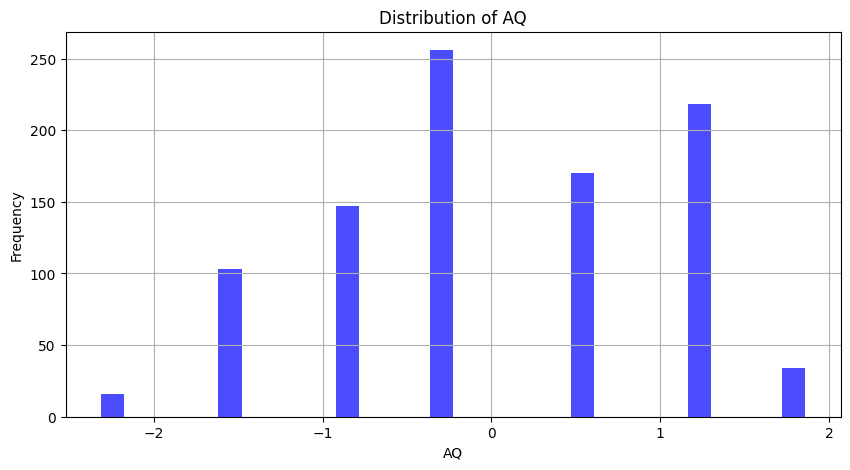

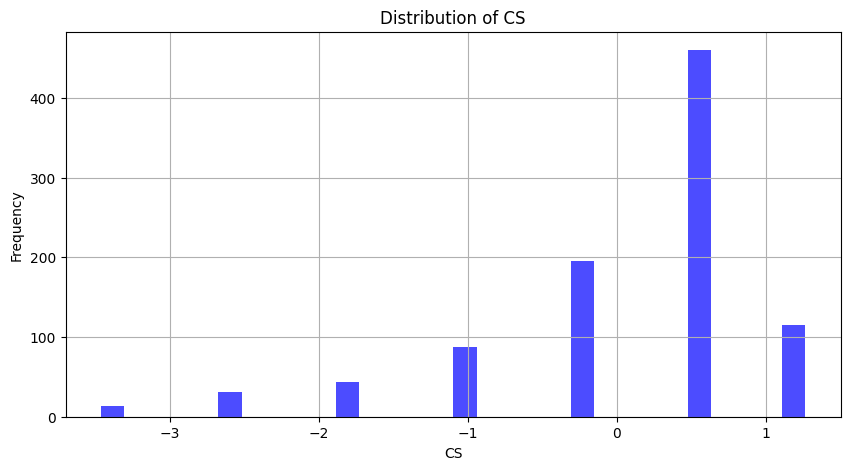

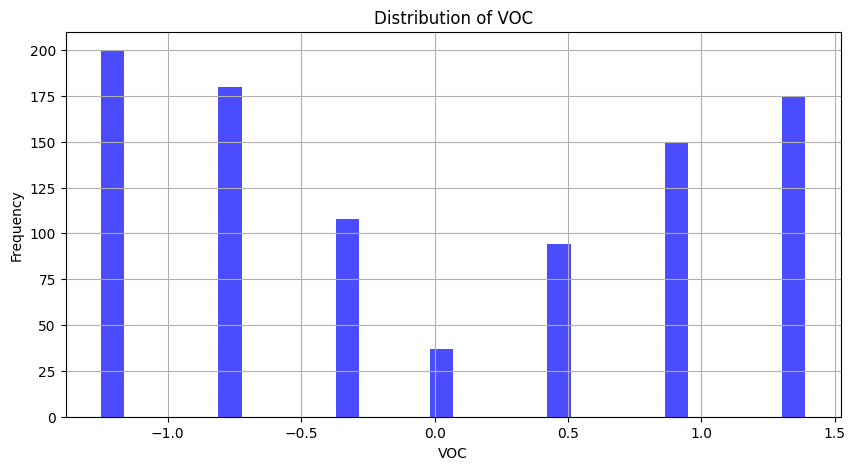

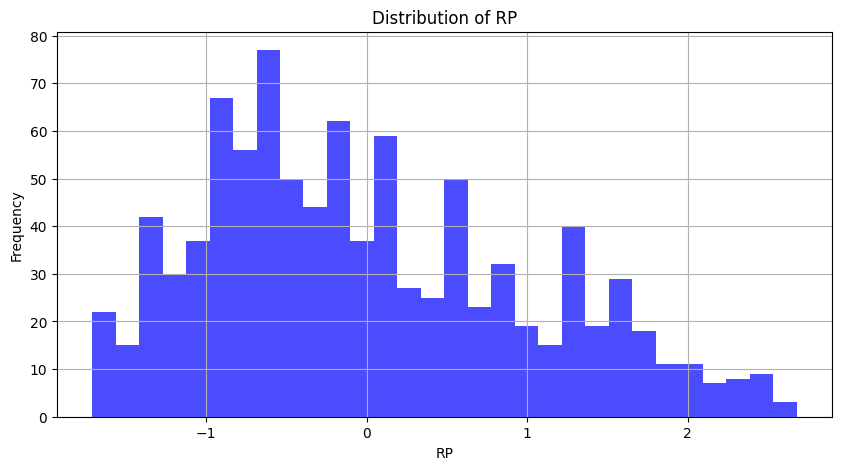

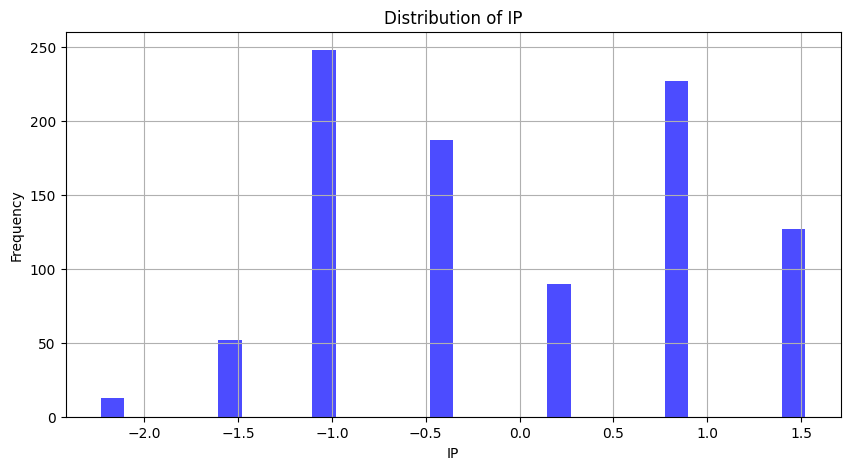

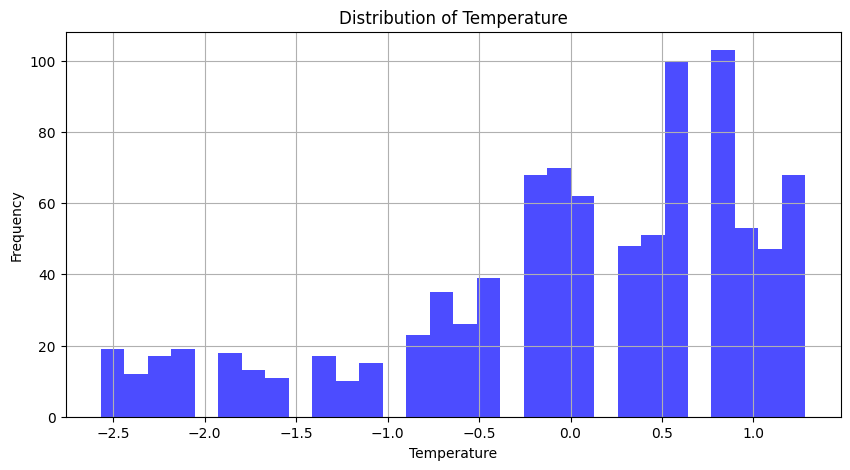

In [ ]:

import matplotlib.pyplot as plt

features = ['footfall', 'tempMode', 'AQ', 'CS', 'VOC', 'RP', 'IP', 'Temperature']

for feature in features:
    plt.figure(figsize=(10, 5))
    plt.hist(data[feature], bins=30, alpha=0.7, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


In [ ]:
# Model Selection and Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Initialize the model
model = RandomForestClassifier(random_state=42)
# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)



In [ ]:
#Evaluate Model Performance
# Print evaluation metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.86      0.87      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



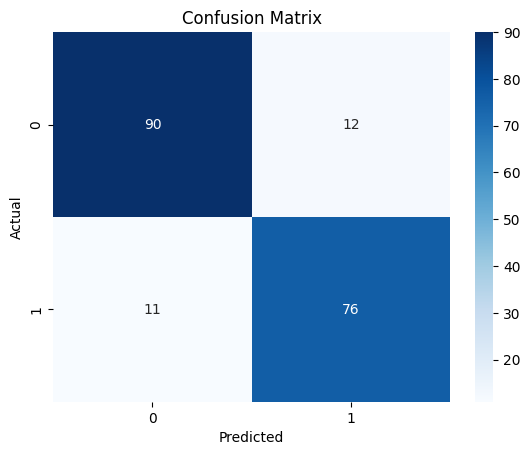

In [ ]:
# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
